This jupyter-notebook has be created with 'jupytext'.

Use this [Link](https://colab.research.google.com/github/magnumnp/magnumnp_demos/blob/main/rkky.ipynb) to directly open the Notebook in Google Colab.

## Install magnum.np and fetch reference data (required for Colab)

In [1]:
!pip install -q triton magnumnp
from os import path
if not path.isdir("ref"):
    !mkdir ref
    !wget -P ref https://gitlab.com/magnum.np/magnum.np/raw/main/demos/rkky/ref/m.dat &> /dev/null

# RKKY Example and benchmark problem

"Accurate finite-difference micromagnetics of magnets including RKKY interaction",
Suess, Dieter, et al.,  arXiv preprint arXiv:2206.11063 (2022).

The analytical saturation field Hx = 5*Hk

## Run Simulation

In [2]:
from magnumnp import *
import torch
import numpy as np
import pathlib
from tqdm import tqdm

set_log_level(25) # show info_green, but hide info_blue
Timer.enable()
try:
    this_dir = pathlib.Path(__file__).resolve().parent
except:
    this_dir = pathlib.Path().resolve()

A = 1e-11
Js = 1.0
Ms = Js/constants.mu_0
Ku = 1e5
tfinal = 20e-9
J_rkky = -2.0e-3
Hxmin = 4.8 * 2*Ku/Js
Hxmax = 5.0 * 2*Ku/Js

# initialize mesh
n  = (1, 1, 400)
dx = (2e-9, 2e-9, 2e-9)
mesh = Mesh(n, dx)
state = State(mesh)

state.material.set({
        "Ms": Ms,
        "A": A,
        "Ku": Ku,
        "Ku_axis": [0,1,0],
        "alpha": 1.0
        })

domain1 = state.Constant(False, dtype=torch.bool)
domain1[:,:,n[2]//2:] = True

domain2 = state.Constant(False, dtype=torch.bool)
domain2[:,:,:-n[2]//2] = True

# Set initial magnetization
state.m = state.Constant([0., 0., 0.])
state.m[domain1] = torch.tensor([0., -1., 0.])
state.m[domain2] = torch.tensor([0., 1., 0.])

# define field terms
exchange1 = ExchangeField(domain1) # Two seperate exchange regions are required,
exchange2 = ExchangeField(domain2) # so that at the RKKY interface the bulk exchange is zero
rkky      = RKKYField(J_rkky, "z", n[2]//2-1, n[2]//2, order=2)
aniso     = UniaxialAnisotropyField()
zeeman    = ExternalField(state.Constant([0, 0, Hxmin]))

minimizer = MinimizerBB([aniso, exchange1, exchange2, rkky, zeeman])
logger = Logger(this_dir / "data", ['t', 'm', zeeman.h], ['m'], fields_every = 100)
for h in tqdm(torch.linspace(Hxmin, Hxmax, steps=100)):
    zeeman.h = state.Constant([0, 0, h])
    minimizer.minimize(state, dm_tol=1e-4)
    logger << state

Timer.print_report()

2026-01-29 13:47:56  magnum.np:INFO magnum.np 2.1.0 (/usr/local/lib/python3.10/site-packages/ipykernel_launcher.py -f /tmp/tmpb0y_n0e5.json --HistoryManager.hist_file=:memory:)


2026-01-29 13:47:56  magnum.np:INFO [State] running on device: cpu (dtype = float64)


2026-01-29 13:47:56  magnum.np:INFO [Mesh] 1x1x400 (dx= 2e-09 x 2e-09 x 2e-09)


TEST


  0%|          | 0/100 [00:00<?, ?it/s]

2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=233, dm_tol = 0.0001)


  1%|          | 1/100 [00:06<10:19,  6.26s/it]

2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


 18%|█▊        | 18/100 [00:06<00:20,  3.94it/s]

2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


 34%|███▍      | 34/100 [00:06<00:07,  8.75it/s]

2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


 49%|████▉     | 49/100 [00:06<00:03, 14.69it/s]

2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


 63%|██████▎   | 63/100 [00:06<00:01, 21.78it/s]

2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


 77%|███████▋  | 77/100 [00:06<00:00, 30.61it/s]

2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


 92%|█████████▏| 92/100 [00:06<00:00, 42.04it/s]

2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


2026-01-29 13:48:03  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 0.0001)


100%|██████████| 100/100 [00:06<00:00, 14.43it/s]


2026-01-29 13:48:03  magnum.np: ===============================================================================


2026-01-29 13:48:03  magnum.np: TIMER REPORT


2026-01-29 13:48:03  magnum.np: ===============================================================================


2026-01-29 13:48:03  magnum.np: Operation                        No of calls    Avg time [ms]    Total time [s]


2026-01-29 13:48:03  magnum.np: -----------------------------  -------------  ---------------  ----------------


2026-01-29 13:48:03  magnum.np: MinimizerBB.minimize                     100       67.0321           6.70321


2026-01-29 13:48:03  magnum.np:     UniaxialAnisotropyField.h            433        9.94186          4.30483


2026-01-29 13:48:03  magnum.np:     ExchangeField.h                      866        0.692666         0.599849


2026-01-29 13:48:03  magnum.np:     RKKYField.h                          433        3.49798          1.51463


2026-01-29 13:48:03  magnum.np:     ExternalField.h                      433        0.0129243        0.00559621


2026-01-29 13:48:03  magnum.np: ExternalField.h                          100        0.0206279        0.00206279


2026-01-29 13:48:03  magnum.np: -----------------------------  -------------  ---------------  ----------------


2026-01-29 13:48:03  magnum.np: Total                                                                6.94122


2026-01-29 13:48:03  magnum.np: Missing                                                              0.235956


2026-01-29 13:48:03  magnum.np: ===============================================================================


## Plot Results

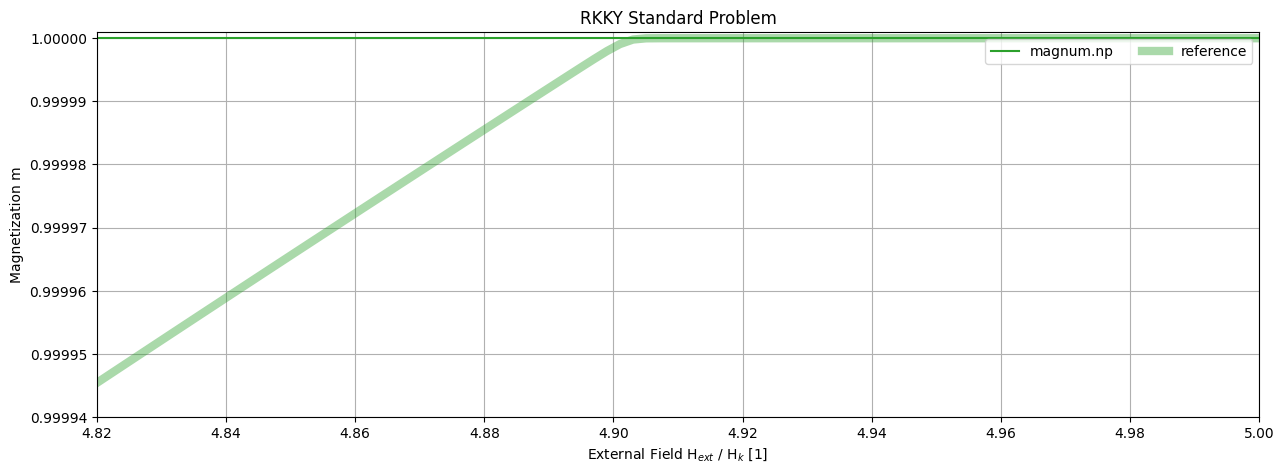

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = np.loadtxt("data/log.dat")
ref = np.loadtxt("ref/log.dat")

Hk = 2 * 1e5 / 1.

fig, ax = plt.subplots(figsize=(15,5))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.plot(data[:,6]/Hk, data[:,3], '-', color = cycle[2], label = "magnum.np")
ax.plot(ref[:,6]/Hk, ref[:,3], '-', color = cycle[2], linewidth = 6, alpha = 0.4, label = "reference")

ax.set_xlim([4.82,5.0])
ax.set_ylim([0.99994,1.000001])
ax.set_yticklabels(['0.99994', '0.99995', '0.99996', '0.99997', '0.99998', '0.99999', '1.00000'])
ax.set_title("RKKY Standard Problem")
ax.set_xlabel("External Field H$_{ext}$ / H$_k$ [1]")
ax.set_ylabel("Magnetization m")
ax.legend(ncol=3)
ax.grid()
fig.savefig("data/results.png")